<FONT size="5.9pt"> **NB3 - CLIMATE IMPACTS CALCULATED USING DCFs (total and direct biogenic emissions)**
</FONT> 

This jupyter notebook was used to plot the Fig.4 of the manuscript based on data exported from SM2 and saved 



generate the future background databases for the consequential prospective LCA study of bark combustion versus biorefinery using the [*premise*](https://github.com/polca/premise) Python library. The use of *premise* requires a unique **"decryption key"** to run the code that can be obtained by contacting the developer (see documentation). 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline

## Plot climate impacts 100 years time horizon

/tmp/ipykernel_31600/1537039218.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


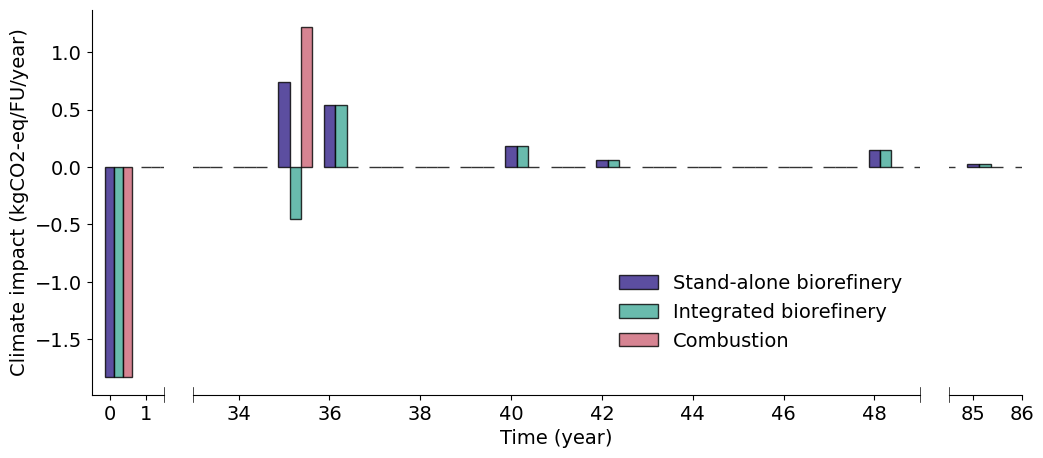

In [102]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec

# Load data from an Excel file
df_CC = pd.read_excel('climate_impacts_cc.xlsx')

# Define color codes for the bars (one color for each scenario)
colors = ['#332288', '#44AA99', '#CC6677']

# Create the main figure and a GridSpec layout with three panels
fig = plt.figure(figsize=(12, 5))
spec = gridspec.GridSpec(1, 3, figure=fig, wspace=0.1, width_ratios=[0.1, 1, 0.1])

# Create subplots for the three panels
ax1 = fig.add_subplot(spec[0, 0])  # First panel
ax2 = fig.add_subplot(spec[0, 1])  # Second panel
ax3 = fig.add_subplot(spec[0, 2])  # Third panel

# Bar settings
bar_width = 0.25  # Width of each bar
x_positions = np.arange(len(df_CC["t"]))  # X-axis positions for the bars (based on the time column)

# Plot bars for each scenario in each panel
for ax in fig.axes:  # Loop over each subplot (ax1, ax2, ax3)
    for i, scenario in enumerate(df_CC.columns[1:]):  # Loop over all scenarios (columns except 't')
        y_vals = df_CC[scenario]  # Extract data for the current scenario
        valid_idx = ~df_CC[scenario].isna()  # Create a mask for valid (non-NaN) values
        ax.bar(
            x_positions[valid_idx] + i * bar_width,  # Offset each scenario by i * bar_width
            y_vals[valid_idx],                      # Y-values for the bars
            width=bar_width,                        # Bar width
            label=scenario,                         # Scenario name for the legend
            color=colors[i],                        # Bar color
            edgecolor='black',                      # Outline color for the bars
            alpha=0.8                               # Bar transparency
        )

# Customize x-axis limits for each panel to focus on specific ranges of data
ax1.set_xlim(-0.5, 1.5)  # Focus on the first time segment
ax2.set_xlim(33, 49)     # Focus on the middle time segment
ax3.set_xlim(84.5, 86)   # Focus on the last time segment

# Add axis labels
ax2.set_xlabel("Time (year)", fontsize=14)  # X-axis label
ax1.set_ylabel("Climate impact (kgCO2-eq/FU/year)", fontsize=14)  # Y-axis label for the first panel

# Add legend to the second panel
ax2.legend(frameon=False, bbox_to_anchor=(1, 0.07),loc='lower right', fontsize=14)

# Remove unnecessary spines and y-ticks for cleaner appearance
ax1.spines.right.set_visible(False)  # Hide the right spine for the first panel
ax2.spines.left.set_visible(False)   # Hide the left spine for the second panel
ax2.spines.right.set_visible(False)  # Hide the right spine for the second panel
ax3.spines.left.set_visible(False)   # Hide the left spine for the third panel

# Remove unnecessary spines for cleaner appearance
for ax in [ax1, ax2, ax3]:
    ax.spines['right'].set_visible(False)  # Hide the right spine
    ax.spines['top'].set_visible(False)    # Hide the top spine

ax2.set_yticks([])  # Remove y-ticks for the second panel
ax3.set_yticks([])  # Remove y-ticks for the third panel

# Add diagonal lines to indicate breaks in the x-axis
d = 0.02  # Size of the diagonal lines in axis coordinates

# Panel 1: Bottom-right diagonal
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1, 1), (d, -d), **kwargs, zorder=101, lw=0.5)

# Panel 2: Bottom-left and bottom-right diagonals
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax2.plot((0, 0), (d, -d), **kwargs, zorder=101, lw=0.5)  # Bottom-left diagonal
ax2.plot((1, 1), (d, -d), **kwargs, zorder=101, lw=0.5)  # Bottom-right diagonal

# Set tick parameters for font size
for ax in fig.axes:
    ax.tick_params(axis='x', labelsize=14)  # Increase x-axis tick font size
    ax.tick_params(axis='y', labelsize=14)  # Increase y-axis tick font size

# Panel 3: Bottom-left diagonal
kwargs = dict(transform=ax3.transAxes, color='k', clip_on=False)
ax3.plot((0, 0), (d, -d), **kwargs, zorder=101, lw=0.5)

# Adjust layout to ensure proper spacing
plt.tight_layout()
plt.savefig('/home/leabraud/Documents/LCAbark/results/fig4_climate_impacts_DCFs_total_emissions.pdf', dpi=300, bbox_inches='tight')
# Display the plot
plt.show()


/tmp/ipykernel_31600/2582020244.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


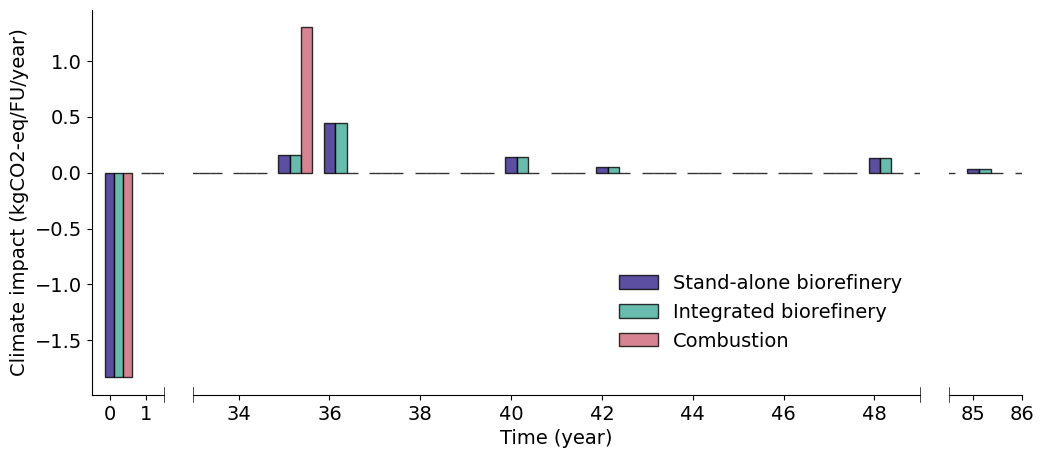

In [101]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec

# Load data from an Excel file
df_CC = pd.read_excel('climate_impacts_cc_directbioC.xlsx')

# Define color codes for the bars (one color for each scenario)
colors = ['#332288', '#44AA99', '#CC6677']

# Create the main figure and a GridSpec layout with three panels
fig = plt.figure(figsize=(12, 5))
spec = gridspec.GridSpec(1, 3, figure=fig, wspace=0.1, width_ratios=[0.1, 1, 0.1])

# Create subplots for the three panels
ax1 = fig.add_subplot(spec[0, 0])  # First panel
ax2 = fig.add_subplot(spec[0, 1])  # Second panel
ax3 = fig.add_subplot(spec[0, 2])  # Third panel

# Bar settings
bar_width = 0.25  # Width of each bar
x_positions = np.arange(len(df_CC["t"]))  # X-axis positions for the bars (based on the time column)

# Plot bars for each scenario in each panel
for ax in fig.axes:  # Loop over each subplot (ax1, ax2, ax3)
    for i, scenario in enumerate(df_CC.columns[1:]):  # Loop over all scenarios (columns except 't')
        y_vals = df_CC[scenario]  # Extract data for the current scenario
        valid_idx = ~df_CC[scenario].isna()  # Create a mask for valid (non-NaN) values
        ax.bar(
            x_positions[valid_idx] + i * bar_width,  # Offset each scenario by i * bar_width
            y_vals[valid_idx],                      # Y-values for the bars
            width=bar_width,                        # Bar width
            label=scenario,                         # Scenario name for the legend
            color=colors[i],                        # Bar color
            edgecolor='black',                      # Outline color for the bars
            alpha=0.8                               # Bar transparency
        )

# Customize x-axis limits for each panel to focus on specific ranges of data
ax1.set_xlim(-0.5, 1.5)  # Focus on the first time segment
ax2.set_xlim(33, 49)     # Focus on the middle time segment
ax3.set_xlim(84.5, 86)   # Focus on the last time segment

# Add axis labels
ax2.set_xlabel("Time (year)", fontsize=14)  # X-axis label
ax1.set_ylabel("Climate impact (kgCO2-eq/FU/year)", fontsize=14)  # Y-axis label for the first panel

# Add legend to the second panel
ax2.legend(frameon=False, bbox_to_anchor=(1, 0.07),loc='lower right', fontsize=14)

# Remove unnecessary spines and y-ticks for cleaner appearance
ax1.spines.right.set_visible(False)  # Hide the right spine for the first panel
ax2.spines.left.set_visible(False)   # Hide the left spine for the second panel
ax2.spines.right.set_visible(False)  # Hide the right spine for the second panel
ax3.spines.left.set_visible(False)   # Hide the left spine for the third panel

# Remove unnecessary spines for cleaner appearance
for ax in [ax1, ax2, ax3]:
    ax.spines['right'].set_visible(False)  # Hide the right spine
    ax.spines['top'].set_visible(False)    # Hide the top spine

ax2.set_yticks([])  # Remove y-ticks for the second panel
ax3.set_yticks([])  # Remove y-ticks for the third panel

# Add diagonal lines to indicate breaks in the x-axis
d = 0.02  # Size of the diagonal lines in axis coordinates

# Panel 1: Bottom-right diagonal
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1, 1), (d, -d), **kwargs, zorder=101, lw=0.5)

# Panel 2: Bottom-left and bottom-right diagonals
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax2.plot((0, 0), (d, -d), **kwargs, zorder=101, lw=0.5)  # Bottom-left diagonal
ax2.plot((1, 1), (d, -d), **kwargs, zorder=101, lw=0.5)  # Bottom-right diagonal

# Set tick parameters for font size
for ax in fig.axes:
    ax.tick_params(axis='x', labelsize=14)  # Increase x-axis tick font size
    ax.tick_params(axis='y', labelsize=14)  # Increase y-axis tick font size

# Panel 3: Bottom-left diagonal
kwargs = dict(transform=ax3.transAxes, color='k', clip_on=False)
ax3.plot((0, 0), (d, -d), **kwargs, zorder=101, lw=0.5)

# Adjust layout to ensure proper spacing
plt.tight_layout()
plt.savefig('/home/leabraud/Documents/LCAbark/results/fig4_climate_impacts_DCFs_direct_emissions.pdf', dpi=300, bbox_inches='tight')
# Display the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Marker options
markers = ['o', 's', 'D']  # Circle, square, diamond

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Data
data = {
    "t": [0, 35, 36, 40, 42, 48, 50, 55, 56, 85],
    "Stand-alone biorefinery": [-1.83, 0.74, 0.54, 0.18, 0.06, 0.15, 0.06, 0.14, 0.02, 0.03],
    "Integrated biorefinery": [-1.83, -0.45, 0.54, 0.18, 0.06, 0.15, 0.06, 0.14, 0.02, 0.03],
    "Combustion": [-1.83, 1.2179, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],  # Replace 'Nan' with np.nan
}
df_CC = pd.DataFrame(data)

# Color codes for the markers
colors = ['#332288', '#44AA99', '#CC6677']

# Offset values for each scenario to reduce marker overlap
y_offsets = [0, 0.025, -0.025]  # Small vertical offset for each scenario

# Plotting each scenario with unique markers and matching colors
for i, scenario in enumerate(df_CC.columns[1:]):
    # Apply offset to the y-values of each scenario, skipping NaN values
    y_vals = df_CC[scenario] + y_offsets[i]
    
    # Remove NaN values for plotting
    valid_idx = ~df_CC[scenario].isna()  # Mask to get indices of valid (non-NaN) values
    plt.scatter(df_CC["t"][valid_idx], y_vals[valid_idx], label=scenario, s=100, marker=markers[i], 
                color=colors[i], alpha=0.7, edgecolors='black',linewidths=1)
    plt.vlines(df_CC["t"][valid_idx], 0, y_vals[valid_idx], colors=colors[i], alpha=0.4, linewidth=5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Customization
plt.xlabel("Time (year)", fontsize=14)
plt.ylabel("Climate impact (kg CO2-eq/FU/year)", fontsize=14)
plt.axhline(0, color="black", linestyle="--", linewidth=1.2, alpha=0.7)

ax.tick_params(axis='x', labelsize=14, rotation=0)  # Increase x-tick size
ax.tick_params(axis='y', labelsize=14)

plt.legend(frameon=False, bbox_to_anchor=(1, 0.07),loc='lower right', fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()

# Show plot
plt.show()

## Plot characterisation factors

In [100]:
df_CFs = pd.read_excel('partialGWP.xlsx', 'CFs')

fig, ax = plt.subplots(figsize=(7, 5))

plt.plot(df_CFs['Year'], df_CFs['CF CO2 - GWP100'], label='GWP100', color = '#4363d8')
plt.plot(df_CFs['Year'], df_CFs['CF CO2 - GWP500'], label='GWP500', color = '#e6194B')

# Adding titles and labels
plt.xlabel('Year')
plt.ylabel('Characterisation factor (kg CO2-eq)')
plt.legend()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('CFs.pdf')

# Show plot
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'partialGWP.xlsx'